### Introduction
This notebook aims to build different neural networks for identifying hand-written numbers. The performance of different models will be evaluated. The Mnist data set will be used to train the models. 

In [1]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn import metrics
import pandas as pd


### Load the Data

In [2]:
x_train_file = './mnist/train-images.idx3-ubyte'
y_train_file = './mnist/train-labels.idx1-ubyte'
x_test_file = './mnist/t10k-images.idx3-ubyte'
y_test_file = './mnist/t10k-labels.idx1-ubyte'
x_train, train_label = loadlocal_mnist(images_path = x_train_file, labels_path = y_train_file)
x_test, test_label = loadlocal_mnist(images_path = x_test_file, labels_path = y_test_file)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1,28,28, 1))
y_train = tf.one_hot(train_label, 10)
y_test = tf.one_hot(test_label, 10)

label: 0


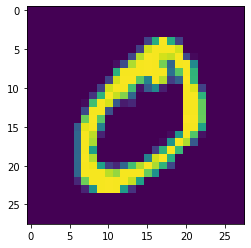

In [3]:
plt.imshow(x_train[1])
print('label: {}'.format(train_label[1]))

### Neural Network with Dense Layers 
We first use neural network with dense layers only, which will act as a benchmark for the CNN models. Two neural network, one with fewer dense layers and one with more dense layers, will be built and tested. 

###### Shallower Version

In [12]:
dense_model = keras.models.Sequential()
dense_model.add(keras.layers.Flatten())
dense_model.add(keras.layers.Dense(64, activation='relu'))
dense_model.add(keras.layers.Dense(10, activation='softmax'))
dense_model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')
hist = dense_model.fit(x_train, y_train, batch_size=256, epochs=15, validation_split=0.1)


Epoch 1/15
211/211 [==============================] - 2s 6ms/step - loss: 6.9397 - accuracy: 0.7691 - val_loss: 0.8014 - val_accuracy: 0.8320
Epoch 2/15
211/211 [==============================] - 1s 4ms/step - loss: 0.7012 - accuracy: 0.8602 - val_loss: 0.4557 - val_accuracy: 0.9077
Epoch 3/15
211/211 [==============================] - 1s 4ms/step - loss: 0.4440 - accuracy: 0.9054 - val_loss: 0.3874 - val_accuracy: 0.9268
Epoch 4/15
211/211 [==============================] - 1s 4ms/step - loss: 0.3319 - accuracy: 0.9260 - val_loss: 0.2974 - val_accuracy: 0.9380
Epoch 5/15
211/211 [==============================] - 1s 4ms/step - loss: 0.2760 - accuracy: 0.9354 - val_loss: 0.2913 - val_accuracy: 0.9438
Epoch 6/15
211/211 [==============================] - 1s 5ms/step - loss: 0.2352 - accuracy: 0.9429 - val_loss: 0.2875 - val_accuracy: 0.9458
Epoch 7/15
211/211 [==============================] - 1s 4ms/step - loss: 0.2126 - accuracy: 0.9502 - val_loss: 0.2703 - val_accuracy: 0.9518
Epoch 

In [13]:
dense_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
pred_y = dense_model.predict(x_test)
pred_y = np.argmax(pred_y, axis = 1)
f1_score = metrics.f1_score(test_label, pred_y, average = None)
acc = metrics.accuracy_score(test_label, pred_y)
print('f1_score: {},   Accuracy: {}'.format(f1_score, acc))

f1_score: [0.97818366 0.98278146 0.95686275 0.94506563 0.96216769 0.94097421
 0.96673597 0.96318115 0.92828685 0.94842263],   Accuracy: 0.9577


###### Deep Version

In [20]:
dense_model2 = keras.models.Sequential()
dense_model2.add(keras.layers.Flatten())
dense_model2.add(keras.layers.Dense(512, activation='relu'))
dense_model2.add(keras.layers.Dense(256, activation='relu'))
dense_model2.add(keras.layers.Dense(128, activation='relu'))
dense_model2.add(keras.layers.Dense(64, activation='relu'))
dense_model2.add(keras.layers.Dense(10, activation='softmax'))
dense_model2.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')
hist = dense_model2.fit(x_train, y_train, batch_size=256, epochs=15, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 2s 8ms/step - loss: 3.0835 - accuracy: 0.8190 - val_loss: 0.2514 - val_accuracy: 0.9263
Epoch 2/15
211/211 [==============================] - 2s 7ms/step - loss: 0.2357 - accuracy: 0.9372 - val_loss: 0.2185 - val_accuracy: 0.9378
Epoch 3/15
211/211 [==============================] - 2s 7ms/step - loss: 0.1542 - accuracy: 0.9590 - val_loss: 0.1174 - val_accuracy: 0.9672
Epoch 4/15
211/211 [==============================] - 2s 7ms/step - loss: 0.1185 - accuracy: 0.9681 - val_loss: 0.1756 - val_accuracy: 0.9612
Epoch 5/15
211/211 [==============================] - 2s 7ms/step - loss: 0.1007 - accuracy: 0.9737 - val_loss: 0.1329 - val_accuracy: 0.9658
Epoch 6/15
211/211 [==============================] - 2s 7ms/step - loss: 0.0857 - accuracy: 0.9768 - val_loss: 0.1221 - val_accuracy: 0.9722
Epoch 7/15
211/211 [==============================] - 2s 7ms/step - loss: 0.0763 - accuracy: 0.9810 - val_loss: 0.1124 - val_accuracy: 0.9742
Epoch 

In [21]:
dense_model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
________________________________________________

In [22]:
pred_y = dense_model2.predict(x_test)
pred_y = np.argmax(pred_y, axis = 1)
f1_score = metrics.f1_score(test_label, pred_y, average = None)
acc = metrics.accuracy_score(test_label, pred_y)
print('f1_score: {},   Accuracy: {}'.format(f1_score, acc))

f1_score: [0.98561151 0.98592788 0.97963143 0.96274794 0.97441146 0.96426546
 0.97912317 0.97131745 0.9648855  0.96593186],   Accuracy: 0.9736


### Observation

By using more dense layers, the accuracy of the model has increased. However, it is worth noting that the parameters of the model also increases significantly.

### CNN model

Convolutional Neural Network is one of the most common models for image recognition. Performance of CNN models with different parameters will be evaluated.

In [24]:
class CNN_model:
    def __init__(self, filters_and_channels, input_shape = (28,28,1)):
        '''
        Build a CNN model with specified filter sizes and number of channels in a Cov2D layer

        Parameters
        -----------
        filters_and_channels: list
            list of tuples specifying (filter_size, number_of_channel)
            
        dense_units: int
            number of units in dense layer
            
        input_shape: tuple
            specifying width and height of the input image
        '''
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.Input(shape = input_shape))
        for filter_size, number_of_channel in filters_and_channels:
            self.model.add(keras.layers.Conv2D(number_of_channel, filter_size, padding='same'))
            self.model.add(keras.layers.MaxPool2D(2))
        self.model.add(keras.layers.Flatten())
        self.model.add(keras.layers.Dense(10, activation = 'softmax'))
    

    def fit(self, x, y, batch_size = 64, epochs = 1, validation_split=0.0, plot=True, **kwargs):
        '''
        Compile the model and fit on the data.

        Parameters
        -----------
        x: array
            Input data with shape (number_of_data, height, width, number_of_channel)
        
        y: array
            Array with shape (number_of_data, 10)
            
        batch_size: int
            Number of samples per gradient update.
            
        epochs: int
            Number of epochs to train the model.
            
        validation_split: float between 0 and 1.
            Fraction of the training data to be used as validation data.
        
        plot: bool
            If true, then plot loss and accuracy at the end of each epoch
        
        Returns
        ----------
        keras.models.Model.fit
            A `History` object.
        '''
        self.model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')
        hist = self.model.fit(x, y, batch_size, epochs, validation_split=validation_split, **kwargs)
        if plot:
            fig, ax = plt.subplots(2, 1, figsize=(10,5))
            x_axis = list(range(1, epochs+1))
            ax[0].plot(x_axis, hist.history['loss'], label='loss')
            ax[0].plot(x_axis, hist.history['val_loss'], label='val_loss')
            ax[0].legend()
            ax[1].plot(x_axis, hist.history['accuracy'], label='accuracy')
            ax[1].plot(x_axis, hist.history['val_accuracy'], label='val_accuracy')
            ax[1].legend()
        return hist
    
    def get_model(self):
        return self.model
    
    def summary(self):
        self.model.summary()
    

    def predict(self, x):
        '''
        Make prediction base on the input x

        Parameters
        -----------
        x: array
            Input data with shape (number_of_data, height, width, number_of_channel)
            
        Returns
        ----------
        array
            Most possible number for each input
        '''
        pred = self.model.predict(x)
        pred = np.argmax(pred, axis = 1)
        return pred
    

    def evaluate(self, x, y):
        '''
        Evaluate the performance of model by f1_score and accuracy

        Parameters
        -----------
        x: array
            Input data with shape (number_of_data, height, width, number_of_channel)
        
        y: 1-d array 
            True label for each input.
            
        Returns
        ----------
        array
            Most possible number for each input
        '''
        pred_y = self.predict(x)
        f1_score = metrics.f1_score(y, pred_y, average = None)
        acc = metrics.accuracy_score(y, pred_y)
        print('f1_score: {},   Accuracy: {}'.format(f1_score, acc))
        return f1_score, acc
    
    

### Evaluating the effect of number of Conv2D layer on accuracy
The performance of model with 1 to 4 Convulation layers will be evaluated based on the accuracy of prediction on test data. The filter size and the number of channel of each Conv2D layer are fixed to be 2 and 5 respectively. 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 5)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 980)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                9810      
Total params: 9,835
Trainable params: 9,835
Non-trainable params: 0
_________________________________________________________________


f1_score: [0.97768763 0.9867374  0.95652174 0.94985251 0.96060606 0.95579183
 0.96577146 0.95039683 0.94360524 0.95488349],   Accuracy: 0.9605


Model: "sequential_11"
_________________________________________________________________
Layer (type) 

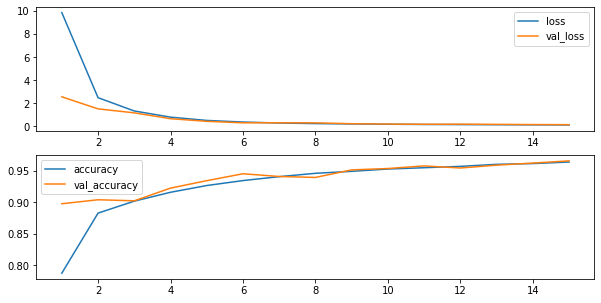

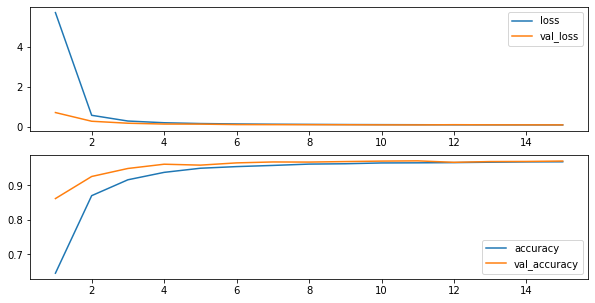

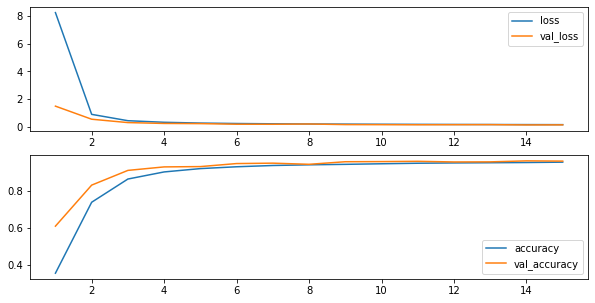

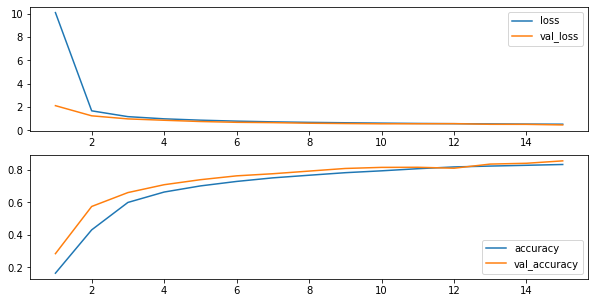

In [26]:
res = dict()
for i in [1, 2, 3, 4]:
    model = CNN_model([(2,5)]*i)
    model.summary()
    print('\n')
    hist = model.fit(x_train, y_train, batch_size=256, epochs = 15, validation_split=0.1, verbose=False)
    f1_score, acc = model.evaluate(x_test, test_label)
    print('\n')
    res['Number_of_Cov2D_Layer: {}'.format(i)] = {'f1_score': f1_score, 'accuracy': acc}

In [27]:
df_res = pd.DataFrame(res)
df_res.T

,f1_score,accuracy
Number_of_Cov2D_Layer: 1,"[0.9776876267748479, 0.986737400530504, 0.9565...",0.9605
Number_of_Cov2D_Layer: 2,"[0.981725888324873, 0.9862283429586851, 0.9639...",0.9671
Number_of_Cov2D_Layer: 3,"[0.9752832131822863, 0.9859278803869833, 0.949...",0.9557
Number_of_Cov2D_Layer: 4,"[0.8923698837796867, 0.9655172413793103, 0.829...",0.8483


### Observation

The number of parameters decreases when more Cov2D layers are used in the model. It seems that using two Cov2D layers is a suitable choice.

### Evaluating the effect of filter_size on accuracy
The performance of model with filter_size 2 to 5 will be evaluated based on the accuracy of prediction on test data. The number of channel and Cov2D layer are fixed to be 5 and 2 respectively. 

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 5)         25        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 5)         105       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 5)           0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 245)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                2460      
Total params: 2,590
Trainable params: 2,590
Non-trainable params: 0
___________________________________________________

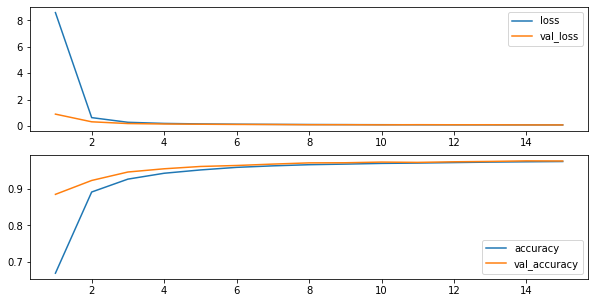

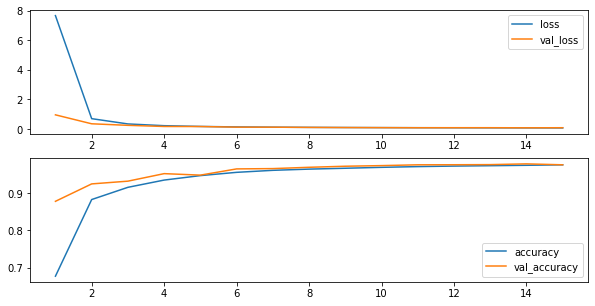

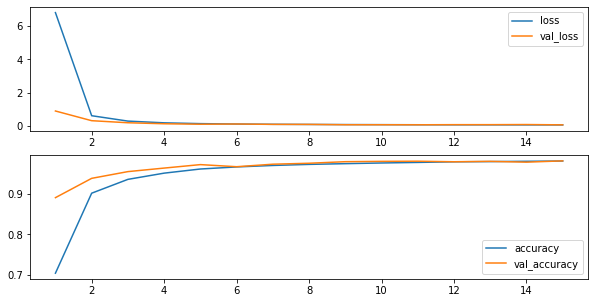

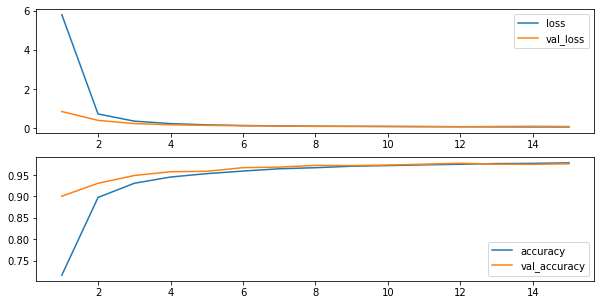

In [28]:
res_2 = dict()
for i in [2,3,4,5]:
    model = CNN_model([(i,5)]*2)
    model.summary()
    print('\n')
    hist = model.fit(x_train, y_train, batch_size=256, epochs = 15, validation_split=0.1, verbose=False)
    f1_score, acc = model.evaluate(x_test, test_label)
    print('\n')
    res_2['Filter_size: {}'.format(i)] = {'f1_score': f1_score, 'accuracy': acc}

In [29]:
df_res2 = pd.DataFrame(res_2)
df_res2.T

,f1_score,accuracy
Filter_size: 2,"[0.9796541200406917, 0.9872862779482683, 0.963...",0.9708
Filter_size: 3,"[0.978227848101266, 0.9886264216972879, 0.9626...",0.9702
Filter_size: 4,"[0.9830508474576272, 0.9912280701754385, 0.975...",0.9774
Filter_size: 5,"[0.9842719431760527, 0.9854945054945053, 0.965...",0.9696


### Observation

By setting padding='same', the number of parameters increases when filter size increases. From the accuracy of differetn models, it seems that filter size does not make too much impact on accuracy.

### Evaluating the effect of number of channel on accuracy
The performance of models with number of channels ranging from 2 to 5 will be evaluated based on the accuracy of prediction on test data. The number of Cov2D layer and filter_size are fixed to be 2 and 4 respectively. 

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 2)         34        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 2)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 2)         66        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 2)           0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 98)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                990       
Total params: 1,090
Trainable params: 1,090
Non-trainable params: 0
___________________________________________________

f1_score: [0.98564103 0.99116608 0.96840058 0.97070312 0.97613002 0.97519729
 0.98319328 0.9753937  0.96443089 0.97246804],   Accuracy: 0.9764




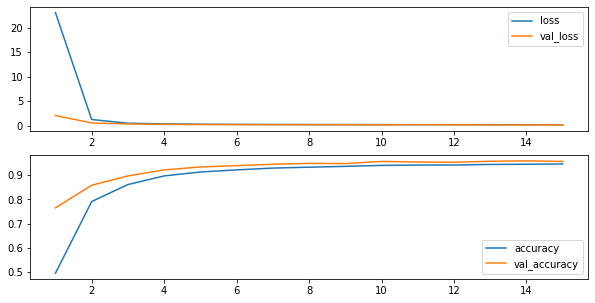

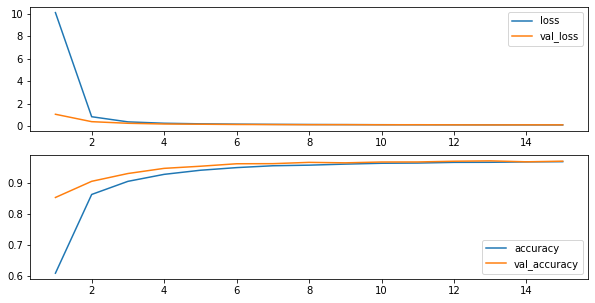

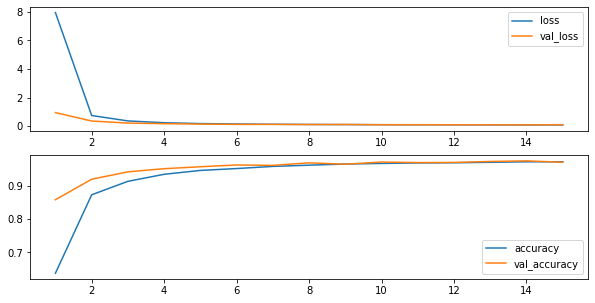

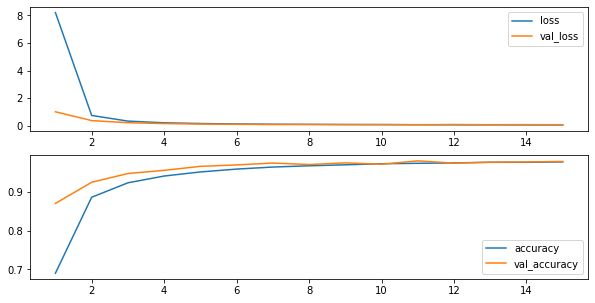

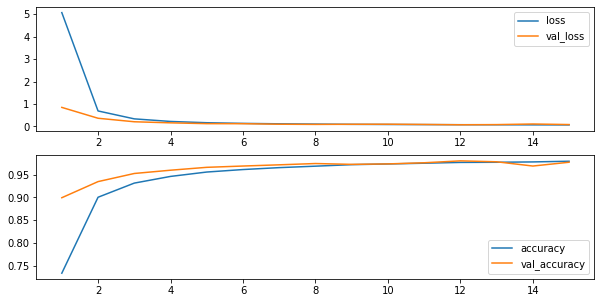

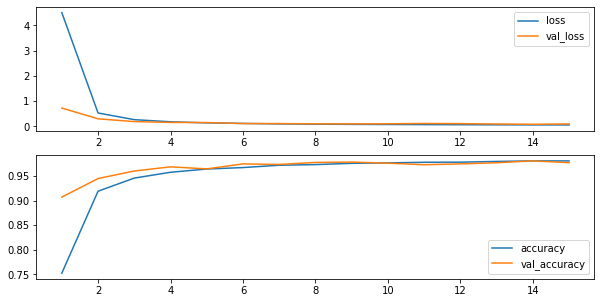

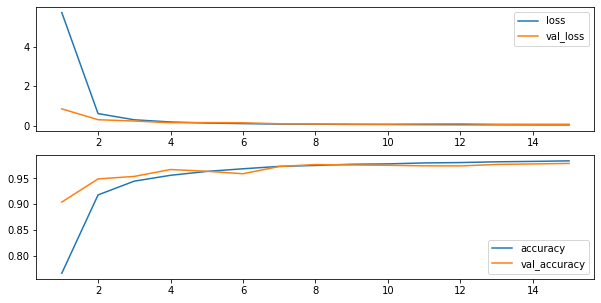

In [30]:
res_3 = dict()
for i in [2,3,4,5,6,7,8]:
    model = CNN_model([(4,i)]*2)
    model.summary()
    print('\n')
    hist = model.fit(x_train, y_train, batch_size=256, epochs = 15, validation_split=0.1, verbose=False)
    f1_score, acc = model.evaluate(x_test, test_label)
    print('\n')
    res_3['Number_of_Channel: {}'.format(i)] = {'f1_score': f1_score, 'accuracy': acc}

In [31]:
df_res3 = pd.DataFrame(res_3)
df_res3.T

,f1_score,accuracy
Number_of_Channel: 2,"[0.9770525242223355, 0.971304347826087, 0.9318...",0.9479
Number_of_Channel: 3,"[0.9796747967479675, 0.9863975427819218, 0.960...",0.9697
Number_of_Channel: 4,"[0.9792615073343449, 0.9803043867502238, 0.958...",0.9639
Number_of_Channel: 5,"[0.9762506316321374, 0.9847494553376905, 0.967...",0.9732
Number_of_Channel: 6,"[0.9852567361464158, 0.9876760563380281, 0.964...",0.9727
Number_of_Channel: 7,"[0.9843037974683545, 0.9882044560943642, 0.968...",0.9745
Number_of_Channel: 8,"[0.9856410256410257, 0.9911660777385158, 0.968...",0.9764


### Observation

The number of parameters increases when mumber of channel increases. From the result above, it shows that the accuracy genereally increases when more channel is used. However, the marginal increase in accuracy is decreasing. By considering complexity of the model and accuracy above, 5 channels should be a suitable choice. 

### Conclusion

By comparing fully connected models with CNN models, we can see that although CNN models use far fewer parameters than fully connected models do, CNN models have accuracy comparable to or even better than fully connected models